## Background / Motivation

According to a 2019 articel by Forbes, 80% of movies lose money. We were interested in predicting movie profitbility to increase security in production companies, and for directors concerned with money (which we understand is not all of them). 

## Problem statement 

We aim to predict profitable movies so that production companies can pick them up and make money. We also aim to shed light on the important qualities of movies that make some sell better that others, so that movie makers concerned with making money can create profitable movies. 

## Data sources

We used The Movies Dataset on Kaggle. This dataset includes 45,466 different movies released before July 2017. The dataset has 29 columns. 

https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?resource=download&select=movies_metadata.csv

## Stakeholders

Our stakeholders are movie makers and production companies concerned with making profitable movies. If we are successful, they will make more money and be able to invest in more movies.

## Data quality check / cleaning / preparation 

This dataset was pretty messy right off the bat. It would be unnecessary to show the information from the raw dataset. In the data quality check, we noticed many movies had zero budget and zero revenue. This is likely due to indie or privately funded movies that have no record of budget. Because of this, we decided to create our own binary column: 'profitable' based on if the movie made any money or not. There were also many highly specific categorical variables. We transforomed those into binary columns. For example, homepage had links to websites but we transformed that into a binary variable if the movie had a homepage or not. We also created the release_month column from the release_date column. 

Once we cleaned the dataset, we were left with 15 columns. 6 numeric and 9 categorical.

In [ ]:
#| echo: false
print('adult:')
print('Missing    ', data.adult.isna().sum())
print(data.adult.value_counts())
print(' ')
print('Genre:')
print('Missing       ', data.genres.isna().sum())
print(data.genres.value_counts()[:5])
print(' ')
print('Original Language:')
print('Missing   ', data.original_language.isna().sum())
print(data.original_language.value_counts()[:5])
print(' ')
print('Production Country:')
print('Missing   ', data.production_countries.isna().sum())
print(data.production_countries.value_counts()[:5])
print(' ')
print('spoken languages:')
print('Missing   ', data.spoken_languages.isna().sum())
print(data.spoken_languages.value_counts()[:5])
print(' ')
print('status:')
print('Missing   ', data.status.isna().sum())
print(data.status.value_counts()[:5])
print(' ')
print('release date:')
print('Missing   ', data.release_date.isna().sum())
print(data.release_date.value_counts()[:5])
print(' ')
print('release month:')
print('Missing   ', data.release_month.isna().sum())
print(data.release_month.value_counts()[:5])
print(' ')
print('video:')
print('Missing   ', data.video.isna().sum())
print(data.video.value_counts()[:2])
data.describe()

adult:
Missing     0
False    25292
True         1
Name: adult, dtype: int64
 
Genre:
Missing        758
Drama          7337
Comedy         5064
Action         2854
Documentary    1717
Horror         1452
Name: genres, dtype: int64
 
Original Language:
Missing    3
en    19404
fr     1340
ja      768
de      516
it      442
Name: original_language, dtype: int64
 
Production Country:
Missing    2437
US    12170
GB     1926
FR     1624
JP      865
DE      839
Name: production_countries, dtype: int64
 
spoken languages:
Missing    1456
en    17061
fr     1365
ja      763
de      653
es      554
Name: spoken_languages, dtype: int64
 
status:
Missing    35
Released           25122
Rumored              118
Post Production       13
In Production          3
Planned                2
Name: status, dtype: int64
 
release date:
Missing    29
2008-01-01    76
2007-01-01    74
2009-01-01    72
2006-01-01    58
2002-01-01    57
Name: release_date, dtype: int64
 
release month:
Missing    0
1     3006

,belongs_to_collection,budget,homepage,runtime,tagline,release_month,profitable
count,25293.000000,2.529300e+04,25293.000000,25246.000000,25293.000000,25293.000000,25292.000000
mean,0.115091,6.441189e+06,0.166331,99.144102,0.554580,6.565255,0.191365
std,0.319138,2.081651e+07,0.372385,32.976143,0.497022,3.586406,0.393383
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,88.000000,0.000000,3.000000,0.000000
50%,0.000000,0.000000e+00,0.000000,97.000000,1.000000,7.000000,0.000000
75%,0.000000,2.500000e+05,0.000000,110.000000,1.000000,10.000000,0.000000
max,1.000000,3.800000e+08,1.000000,1256.000000,1.000000,12.000000,1.000000


<AxesSubplot:xlabel='profitable', ylabel='count'>

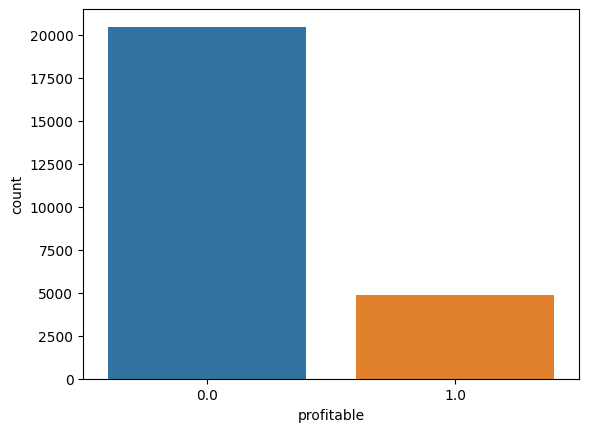

In [ ]:
#| echo: false
sns.countplot(x=data["profitable"])

For all the missing values in the numerical variables, we imputed them with KNN. For missing values in the catgeorical variables, we imputed them with the previous non-missing row.

## Exploratory data analysis

As seen above in the distribution of the response variable, we had very unbalanced data. Becuase of this, we decided to undersample from the original dataset when we trained our models. This way our sample data would have 50% profitable and 50% unprofitable movies. 

Since this data was largely categorical, we did not eliminate outliers. 

## Approach

We used three boosting models (adaboost, gradient boosting, XGBoost) and random forest. We optimized accuracy and recall. Accuracy, so we could see how well our model was performing. Anything over 50% would be a success. Recall because production companies, by nature, are willing to assume a pretty high level of risk, and a single very profitble movie could keep a production company afloat financially. We figured a production company would be more averse to missing out on a profitable movie compared to losing a little bit of money on an unprofitable one. 

We neither anticipated nor ran into any major problems in the modelling process. There were no solutions to our particular predictive problem (where we used no columns that are recorded after a movie is released) posted on Kaggle. 

## Developing the model: Hyperparameter tuning

Every person must describe their hyperparameter tuning procedure. Show the grid of hyperparameter values over which the initial search was done *(you may paste your grid search / random search / any other search code)*, and the optimal hyperparameter values obtained. After getting the initial search results, how did you make decisions *(if any)* to further fine-tune your model. Did you do another grid / random search or did you tune hyperparameters sequentially? If you think you didn't need any fine tuning after the initial results, then mention that and explain why.

Put each model in a section of its name and mention the name of the team-member tuning the model. Below is an example:

### Random Forest
*By Lena Choe*

I first tuned the hyperparameters over the grid shown below.

In [ ]:
start_time = time.time()

params = {'n_estimators': [1000, 1500],
          'max_features': range(1,9),
          'max_depth': range(8, 20, 4),
          'max_leaf_nodes': range(30, 60, 4)
         }

param_list=list(it.product(*(params[Name] for Name in list(params.keys()))))
oob_accuracy = [0]*len(param_list)

i=0
for pr in param_list:
    model = RandomForestClassifier(random_state=1,
                                   oob_score=True,
                                   verbose=False,
                                   n_estimators = pr[0],
                                   max_features=pr[1], 
                                   max_depth=pr[2], 
                                   max_leaf_nodes=pr[3], 
                                   n_jobs=-1).fit(X_train,y_train)
    oob_accuracy[i] = model.oob_score_
    i=i+1
    
end_time = time.time()
print("time taken = ", (end_time-start_time)/60, " minutes")
print("max accuracy = ", np.max(oob_accuracy))
print("params= ", param_list[np.argmax(oob_recall)])

time taken =  51.60229480266571  minutes
max accuracy =  0.7809438112377525
params=  (1500, 3, 8, 58)


I did not think tuning it further would be necessary because it had an adequate accuracy, so I moved onto tuning the decision threshold.

In [ ]:
model_rf = RandomForestClassifier(random_state=1,
                                   oob_score=True,
                                   verbose=False,
                                   n_estimators = 1500,
                                   max_features=3, 
                                   max_depth=8, 
                                   max_leaf_nodes=58, 
                                   n_jobs=-1).fit(X_train,y_train.values.ravel())

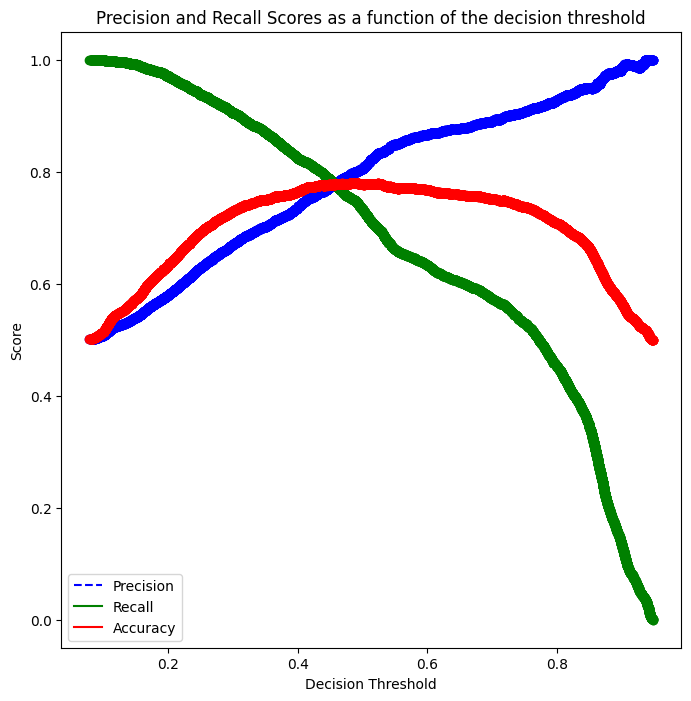

In [ ]:
y_pred_prob = model.oob_decision_function_[:,1]
p, r, thresholds = precision_recall_curve(y_train, y_pred_prob)
acc = np.ndarray(shape = (len(thresholds),))
i = 0
for th in thresholds:
    y_pred = y_pred_prob > th
    y_pred = y_pred.astype(int)
    acc[i] = accuracy_score(y_pred, y_train)
    i = i + 1
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.plot(thresholds, acc, "r-", label="Accuracy")
    plt.plot(thresholds, precisions[:-1], "o", color = 'blue')
    plt.plot(thresholds, recalls[:-1], "o", color = 'green')
    plt.plot(thresholds, acc, "o", color = 'red')
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    plt.legend()
plot_precision_recall_vs_threshold(p, r, thresholds)

In [ ]:
# Thresholds with precision and recall
all_thresholds = np.concatenate([thresholds.reshape(-1,1), acc.reshape(-1,1), r[:-1].reshape(-1,1)], axis = 1)
recall_more_than_60 = all_thresholds[all_thresholds[:,2]>0.6,:]
# As the values in 'recall_more_than_80' are arranged in decreasing order of recall and increasing threshold,
# the last value will provide the maximum threshold probabiltiy for the recall to be more than 80%
# We wish to find the maximum threshold probability to obtain the maximum possible precision
recall_more_than_60[recall_more_than_60.shape[0]-1]

array([0.65664355, 0.75794841, 0.60003994])

The desired threshold was 0.65664355 and I used it to get the stats on test data.

Accuracy:  76.16081540203851
ROC-AUC:  0.8614552870555641
Precision:  0.8942807625649913
Recall:  0.589041095890411


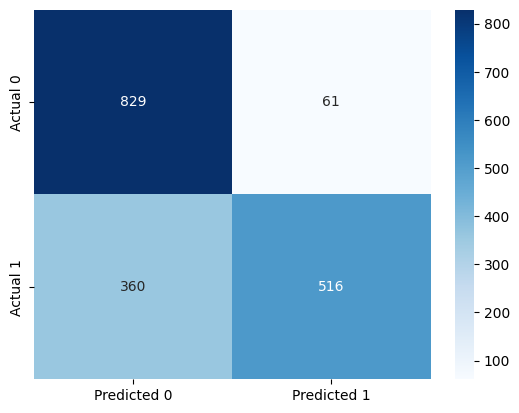

In [ ]:
# test

desired_threshold = 0.65664355

y_pred_prob = model.predict_proba(X_test)[:,1] 

# Classifying observations in the positive class (y = 1) if the predicted probability is greater
# than the desired decision threshold probability
y_pred = y_pred_prob > desired_threshold
y_pred = y_pred.astype(int)

#Computing the accuracy
print("Accuracy: ",accuracy_score(y_pred, y_test)*100)  

#Computing the ROC-AUC
fpr, tpr, auc_thresholds = roc_curve(y_test, y_pred_prob)
print("ROC-AUC: ",auc(fpr, tpr))# AUC of ROC

#Computing the precision and recall
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');

This model performed with 76.16% accuracy and 58.90% recall on the test data, which was not the best performance out of our models, but acceptable because we recognized that there would be better models with better performance for our data, as shown in the rest of the report.

In [ ]:
importances_rf = model_rf.feature_importances_
importances = pd.DataFrame({'Feature':X_train.columns,'importance':importances_rf})
importances.sort_values('importance', ascending = False)

,Feature,importance
1,budget,0.472273
4,tagline,0.200072
3,runtime,0.144662
0,belongs_to_collection,0.051776
2,homepage,0.039504
12,production_countries_US,0.026053
13,spoken_languages_en,0.019441
5,release_month,0.017205
8,genres_Documentary,0.008131
11,production_countries_IN,0.005834


### Adaptive Boosting
*By Sean Park*

In [10]:
# adaptive Boosting
model_ada = AdaBoostClassifier(random_state=1,base_estimator = DecisionTreeClassifier(max_depth=2),learning_rate=0.08,
                          n_estimators=900).fit(X_train,y_train.values.ravel())

In [78]:
importances_ada = model_ada.feature_importances_
importances = pd.DataFrame({'Feature':X_train.columns,'importance':importances_ada})
importances.sort_values('importance', ascending = False)

,Feature,importance
3,runtime,0.345209
1,budget,0.329511
5,release_month,0.122461
12,production_countries_US,0.031989
0,belongs_to_collection,0.022286
6,genres_Action,0.021387
2,homepage,0.020696
13,spoken_languages_en,0.020636
11,production_countries_IN,0.016929
4,tagline,0.016096


### Gradient Boosting
*By Mehmet Ali Mehmetzade*

In [11]:
# gradient Boosting
model_gb = GradientBoostingClassifier(random_state=1,max_depth=2,learning_rate=0.1,subsample=1,
                          n_estimators=500).fit(X_train, y_train.values.ravel())
# 0.425721729088532

In [79]:
importances_gb = model_gb.feature_importances_
importances = pd.DataFrame({'Feature':X_train.columns,'importance':importances_gb})
importances.sort_values('importance', ascending = False)

,Feature,importance
1,budget,0.688318
3,runtime,0.118158
4,tagline,0.107053
0,belongs_to_collection,0.026426
2,homepage,0.017191
12,production_countries_US,0.013256
5,release_month,0.011512
10,genres_Horror,0.005411
7,genres_Comedy,0.005194
11,production_countries_IN,0.004000


### XGBoost
*By Margaret Pirozzolo*

In [68]:
parameters = {'max_depth':[4,5,6,7,8,9,10,11,12],
              'n_estimators':range(100,7000,200), 
              'learning_rate':[0.01, 0.05, 0.1, 0.15, 0.2,0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.9], 
              'subsample':[0.1,0.2,0.3,0.4,0.5,0.6, 0.7, 0.8, 0.9,1.0], 
              'reg_lambda':[0,1,2,3,4,5,6,7,8,9,10], 
              'gamma':[0,1,2,3,4,5,6,7,8,9,10]}
model = RandomizedSearchCV(xgb.XGBClassifier(random_state=45), param_distributions = parameters, n_iter = 200, 
                           n_jobs=-1, verbose=1, cv=5, scoring=['accuracy','recall'], refit="recall")
model.fit(X_train, y_train)
print (model.best_score_, model.best_params_) 

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0.7522014911236468 {'subsample': 0.6, 'reg_lambda': 8, 'n_estimators': 1100, 'max_depth': 9, 'learning_rate': 0.01, 'gamma': 0}


In [ ]:
model_xgb = xgb.XGBClassifier(random_state=45, max_depth = 8 , n_estimators = 1100, 
                                  learning_rate = 0.01, subsample = 0.6, reg_lambda = 8, gamma = 0)

After this result, I tuned the decision threshold with cross validation. 

In [90]:
model_class = xgb.XGBClassifier(random_state=45, max_depth = 8 , n_estimators = 1100, 
                                  learning_rate = 0.01, subsample = 0.6, reg_lambda = 8, gamma = 0)
cross_val_ypred = cross_val_predict(model_class, X_train.values, y_train_le_total, cv = 5, method = 'predict_proba')

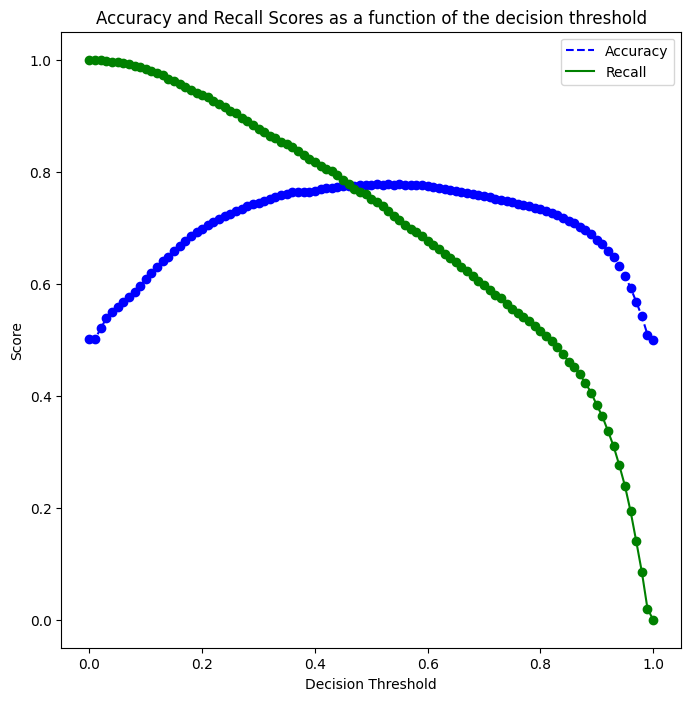

In [91]:
accuracies = []
recalls = []

thresholds = np.arange(0,1.01,0.01)
for threshold in thresholds:
    predicted_class = cross_val_ypred[:,1] > threshold
    predicted_class = predicted_class.astype(int)
    accuracy = accuracy_score(y_train, predicted_class)
    accuracies.append(accuracy)
    recall = recall_score(y_train, predicted_class)
    recalls.append(recall)


def plot_accuracy_recall_vs_threshold(accuracies, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Accuracy and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, accuracies, "b--", label="Accuracy")
    plt.plot(thresholds, recalls, "g-", label="Recall")
    plt.plot(thresholds, accuracies, "o", color = 'blue')
    plt.plot(thresholds, recalls, "o", color = 'green')
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    plt.legend()
plot_accuracy_recall_vs_threshold(accuracies, recalls, thresholds)

After getting these initial search results, I tried many rounds of further turning with gridsearch around the optimal values that this grid output. Interestingly, this randomized search output the best values that I was able to find. I tried splitting the data into 0 budget and positive budget and training separate models, but this led to overfitting and ultimately worse performance on test data. 


In [ ]:
booster = model_xg.get_booster()
importances_xg = booster.get_score()
importances = pd.DataFrame.from_dict(data=importances_xg, 
                                       orient='index')

importances.sort_values(0, ascending = False)

,0
runtime,32239.0
release_month,17903.0
budget,16013.0
production_countries_US,3875.0
homepage,3509.0
genres_Comedy,3113.0
spoken_languages_en,3099.0
tagline,3010.0
belongs_to_collection,2829.0
genres_Drama,2696.0


## Model Ensemble 

Put the results of enembling individual models. Feel free to add subsections in this section to add more innovative ensembling methods.

### Voting ensemble

### Stacking ensemble
Try out different models as the metamodel. You may split work as follows. The person who worked on certain types of models *(say AdaBoost and MARS)* also uses those models as a metamodel in the stacking ensemble.

### Ensemble of ensembled models

If you are creating multiple stacking ensembles *(based on different metamodels)*, you may ensemble them.

In [87]:
#ensembling the ensembles (Margaret)
metastack_model = StackingClassifier(estimators=[('sv',sv_model),('log',logstack_model),('rf',rfstack_model)],
                                   final_estimator=CatBoostClassifier(random_state=45, verbose = False),n_jobs=-1,
                                   cv = 5)
metastack_model.fit(X_train,y_train.values.ravel())
metastack_model.score(X_test, y_test.values.ravel())

0.7763306908267271

## Limitations of the model with regard to prediction

Based on likelihood alone, it seems that the XGBoost model could be better tuned. However, tuning the hyperparameters over and over again led to lower performance. It is very unlikely that the random search output the optimal hyper parameters on the first try, but with our resources, we could not imporve them. 

It is very possible and convenient for porduction companies to collect the data relating to the predictors in our model. All of them are quite simple, especially the most important ones across models (runtime, budget, tagline, and release month). Our model can be used months in advance of release. The only real limiting predictor is runtime, as the exact runtime is often unknown until the movie is finished. However, movies do not get released until months after the movie is finished anyways. 

We don't forsee this model becoming obselete any time soon. However, with the rise of miniseries and short-form content, it is really hard to forsee what the movie landscape will look like in ten years. If the movie landscape shifts completely, then this model will be obsolete. 

## Conclusions and Recommendations to stakeholder(s)

Based on our models, it is clear that the two most important factors in movie porfitablilty are runtime and budget. Our best performing model (XGBoost) also puts a lot of importance on release month. Budget makes sense because higher budget movies can afford crow-pleasing features like CGI and famous actors. Runtime is a little less obvious, but it still makes sense that people won't want to pay money to see a super long or super short movie. Release month is important because there are certain times of year where people have more free time to go to the movies. 

Based on our models, production companies should try and invest in movies with higher budgets. We understand this is difficult for smaller production companies, but higher budgets are generally more profitable. They should also invest in movies in the sweet spot of 110-140 minutes. This range is where the most profitable movies lie. They should try to relase movies in May, June, July, November, or December as these are the most profitable months to release a movies. 

The only limitation we can think of in our model is it could get dated. This can be solved by periodically updating the models and datasets with recent movies. As we mentioned in the previous section, the movies landscape could shift in the wake of shorter form content. This could completely destory our model. However, this has not happened yet.

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 25%;">
       <col span="1" style="width: 40%;">
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Individual Model</th>
    <th>Work other than individual model</th>    
    <th>Details of work other than individual model</th>
  </tr>
  <tr>
    <td>Margaret Pirozzolo</td>
    <td>XGBoost</td>
    <td>Data cleaning, EDA, variable selection, ensembling </td>    
    <td>Imputed missing values, visualized data, created columns, used lasso to select features, created ensemble models</td>
  </tr>
  <tr>
    <td>Lena Choe</td>
    <td>RandomForest</td>
    <td>ensemble analysis</td>    
    <td>Interpreting ensemble for report</td>
  </tr>
    <tr>
    <td>Sean Park</td>
    <td>AdaBoost</td>
    <td>Ensembling</td>    
    <td>Stacking ensembles and voting ensemble</td>
  </tr>
    <tr>
    <td>Mehmet Ali Mehmetzade</td>
    <td>Gradient Boosting</td>
    <td> </td>    
    <td> </td> 
  </tr>
</table>

## Appendix {-}

You may put additional stuff here as Appendix. You may refer to the Appendix in the main report to support your arguments. However, the appendix section is unlikely to be checked while grading, unless the grader deems it necessary.

In [2]:
import pandas as pd
import seaborn as sns

In [6]:
data = pd.read_csv('clean.csv')

In [7]:
data = data.drop(['Unnamed: 0','production_companies','top_crew','top_cast','top_keyword'], axis = 1)